#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display max 50 columns 
pd.set_option('display.max_columns',50)

#To disable SettingWithCopy Error 
pd.options.mode.chained_assignment = None  # default='warn'

#### Read the File

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Shape of dataset

df.shape

(5110, 12)

In [4]:
#Overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Sample of Dataset

df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3454,62914,Male,62.0,0,0,Yes,Private,Rural,60.39,26.9,Unknown,0
1280,35293,Female,80.0,0,0,Yes,Self-employed,Rural,104.07,19.3,formerly smoked,0
388,10504,Male,55.0,0,0,Yes,Govt_job,Rural,97.40,44.6,formerly smoked,0
1463,37907,Female,22.0,0,0,No,Private,Urban,135.64,19.5,never smoked,0
1884,48739,Male,47.0,0,0,Yes,Self-employed,Urban,135.19,36.0,smokes,0


#### Find Duplicate values and missing values

In [6]:
df.duplicated().sum()

0

- No Duplicate values present in the dataset

In [7]:
pd.DataFrame(df.isnull().sum()*100/len(df),columns=['Missing value %'])

,Missing value %
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


- Only **bmi** has about 4% missing values

In [8]:
print(f"Number of missing values in attribute bmi: {df['bmi'].isnull().sum()}")

Number of missing values in attribute bmi: 201


#### dropping unecessary columns

- Only Attribute **id** is not neededd as its information would be irrelevant during data analysis and prediction 

In [9]:
df.drop('id',axis=1,inplace=True)

#### Summary Statistics of data

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

### Univariate analysis for Categorical features

In [11]:
#Display sample of the categorical variables

df_cat=df.select_dtypes(include='object')
df_cat.sample(5)

,gender,ever_married,work_type,Residence_type,smoking_status
4014,Male,Yes,Govt_job,Urban,never smoked
594,Female,Yes,Private,Urban,smokes
2800,Female,Yes,Self-employed,Urban,never smoked
4524,Female,Yes,Private,Urban,never smoked
2968,Male,Yes,Govt_job,Urban,never smoked


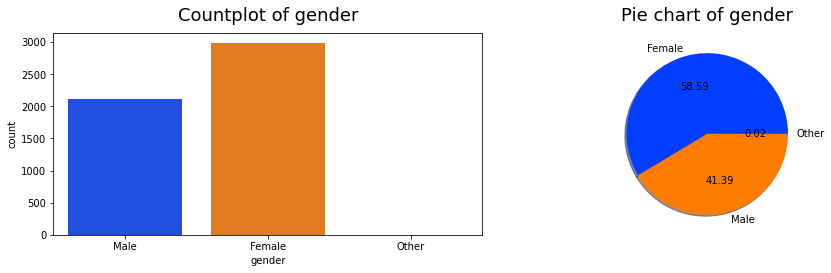

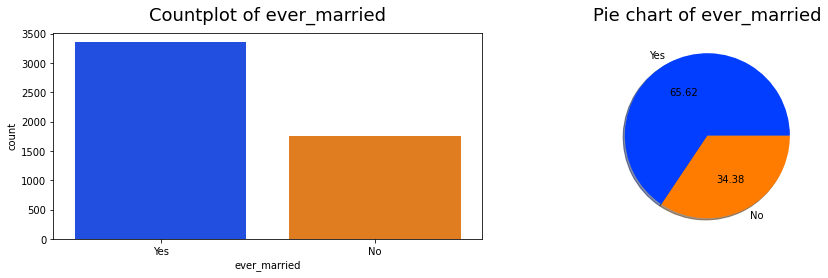

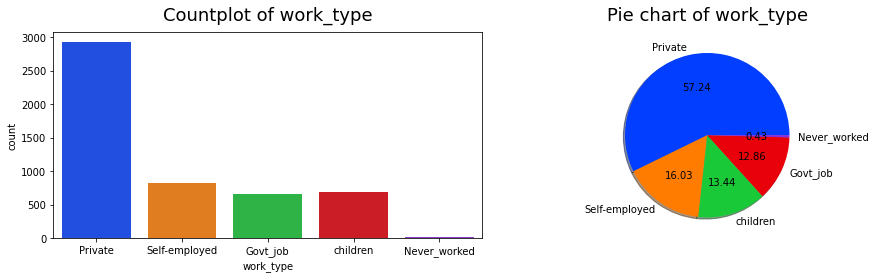

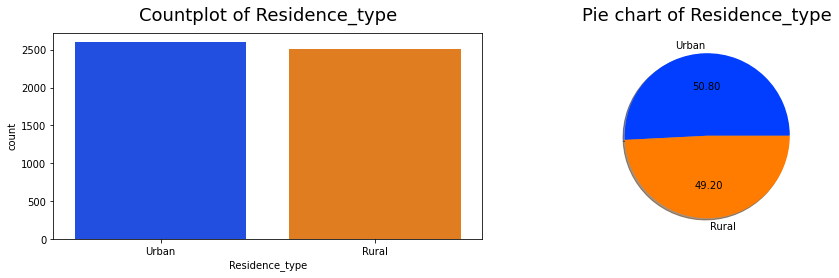

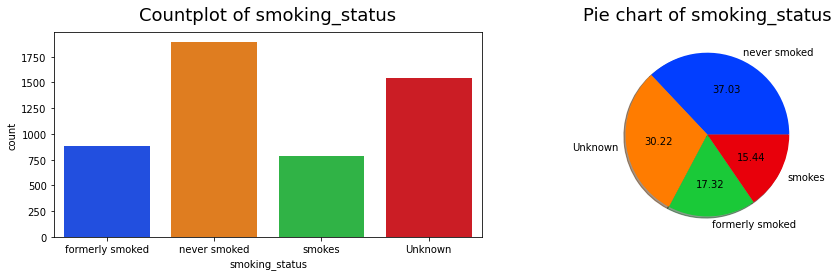

In [12]:
sns.set_palette("bright")
i=1
j=2
for col in df_cat:
    plt.figure(figsize=(13,17))
    plt.subplot(5,2,i)
    sns.countplot(data=df_cat,x=col)
    plt.title(f'Countplot of {col}',fontsize=18,pad=12)
    
    plt.subplot(5,2,j)
    df_cat[col].value_counts().\
    plot(kind='pie',autopct='%.2f',legend=False, shadow=True)
    plt.ylabel(None)
    plt.title(f'Pie chart of {col}',fontsize=18,pad=12)
    plt.tight_layout()
    plt.show()
    i+=2
    j+=2 
    

### Univariate analysis for Numeric features


In [13]:
#Display sample of the numeric variables

df_num=df.select_dtypes(include='number')
df_num.sample(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
2848,63.0,0,0,222.66,37.0,0
2520,26.0,0,0,200.28,31.9,0
4785,16.0,0,0,68.27,20.4,0
4191,31.0,0,0,70.91,28.3,0
3525,46.0,0,0,162.24,24.3,0


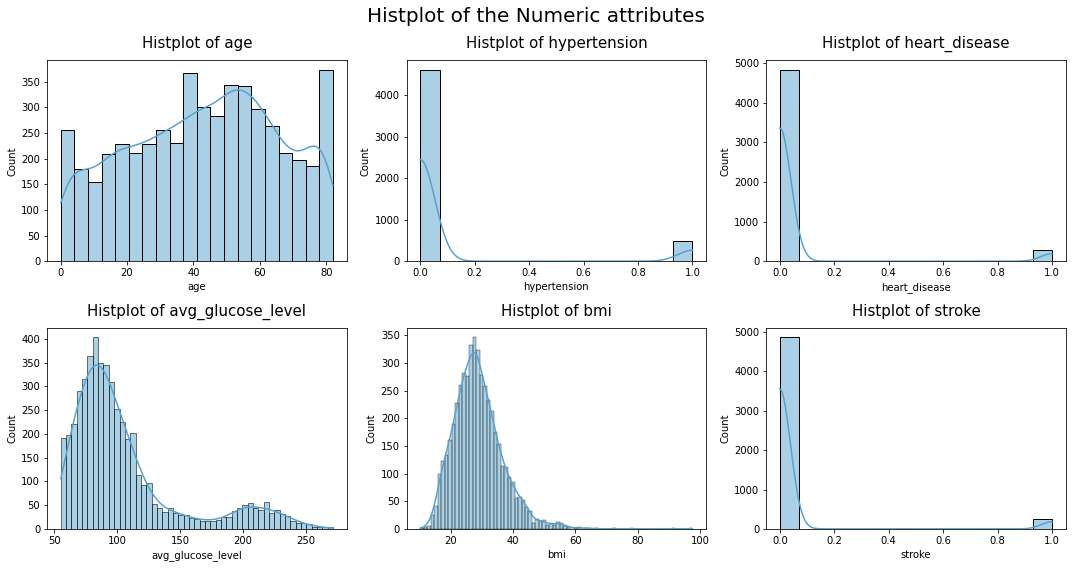

In [14]:
#Creating Histplots of the Numeric attributes

sns.set_palette("icefire")
plt.figure(figsize=(15,8))
plt.suptitle('Histplot of the Numeric attributes',fontsize=20)
i=1
for col in df_num:    
    plt.subplot(2,3,i)
    sns.histplot(data=df_num,x=col,kde=True)
    plt.title(f'Histplot of {col}',fontsize=15,pad=12)
    plt.tight_layout()
    i=i+1

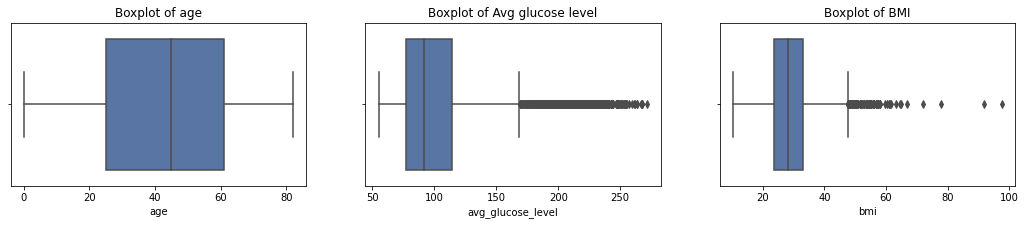

In [15]:
#Creating Boxplots only for continuous numeric attributes
sns.set_palette('deep')

plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.title('Boxplot of age')
sns.boxplot(data=df_num,x='age')

plt.subplot(1,3,2)
plt.title('Boxplot of Avg glucose level')
sns.boxplot(data=df_num,x='avg_glucose_level')

plt.subplot(1,3,3)
plt.title('Boxplot of BMI')
sns.boxplot(data=df_num,x='bmi')

plt.show()


### Multivariate Analysis


#### Heatmap showing correlations of all the variables

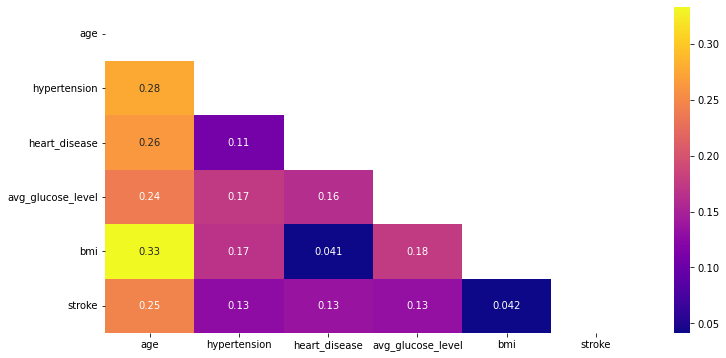

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True,\
            mask=np.triu\
            (np.ones_like(df.corr(),bool)),cmap='plasma')
plt.xticks(rotation=360)
plt.show()

### Pairplot to get an overview of numeric-numeric attributes

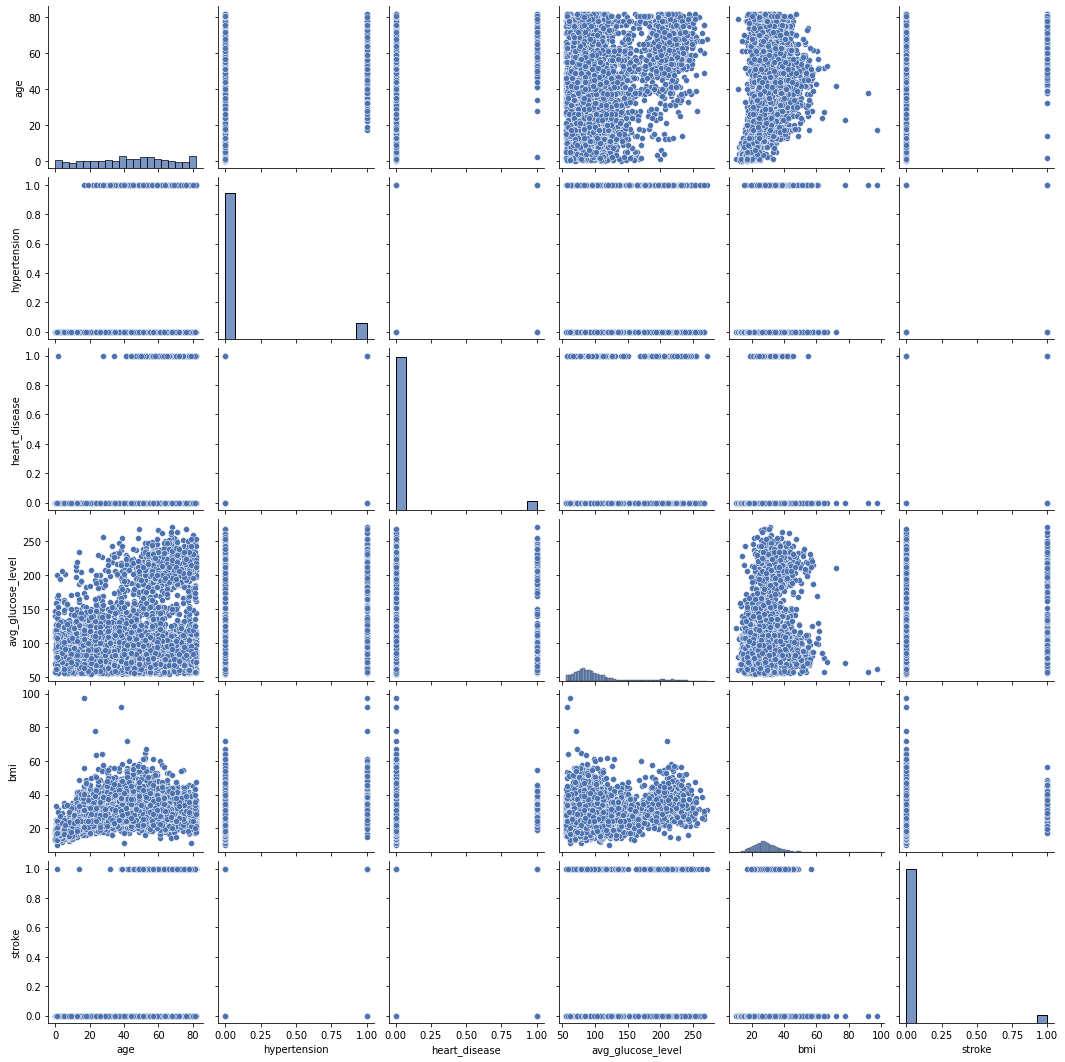

In [17]:
sns.pairplot(data=df)
plt.show()

### Analysis of Stroke w.r.t every other variable
- As our Target variable is **stroke** (numeric type), it would be reasonable to perform further bivariate analysis of stroke w.r.t every other variable 

- **Numeric Attributes**: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']
- **Categorical Attributes**: ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

### Countplot of stroke occurred based on other categories

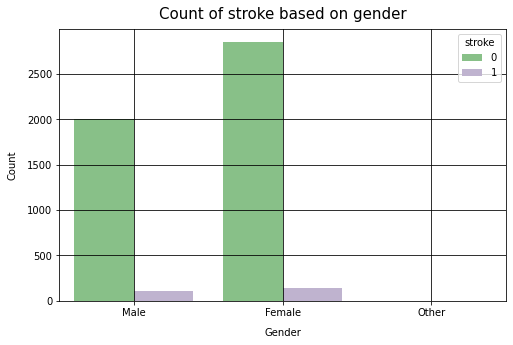

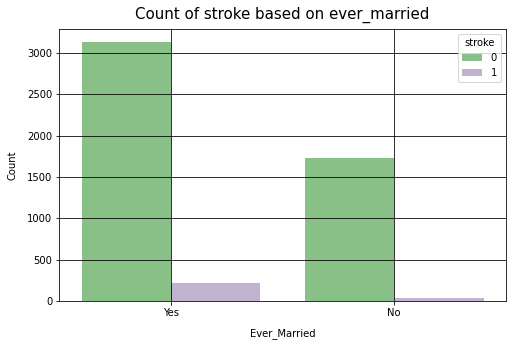

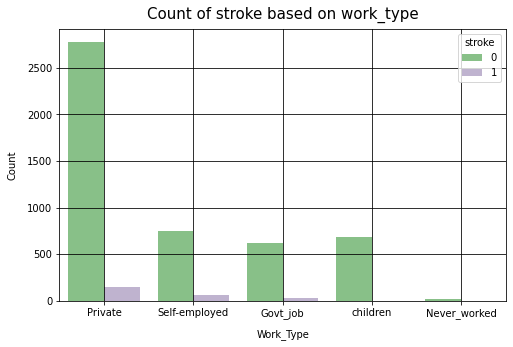

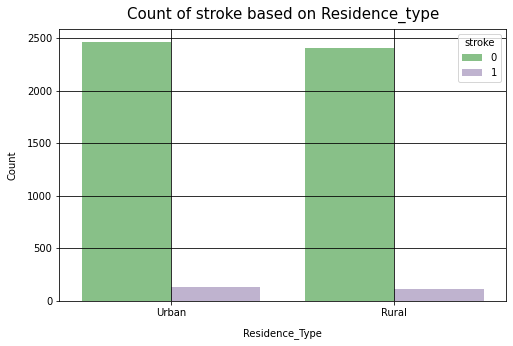

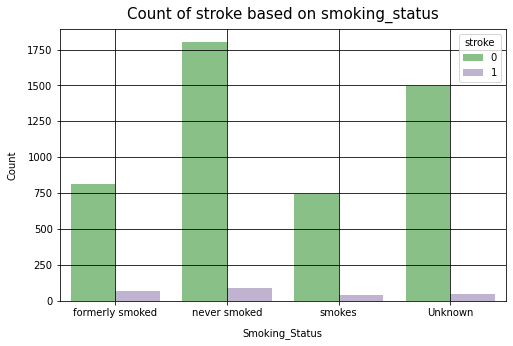

In [18]:
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col,hue='stroke',palette='Accent')
    plt.title(f'Count of stroke based on {col}',fontsize=15,pad=10)
    plt.xlabel(col.title(),labelpad=10)
    plt.ylabel('Count',labelpad=10)
    plt.grid(c='k')
    plt.show()

### Average age of a gender when he/she had stoke

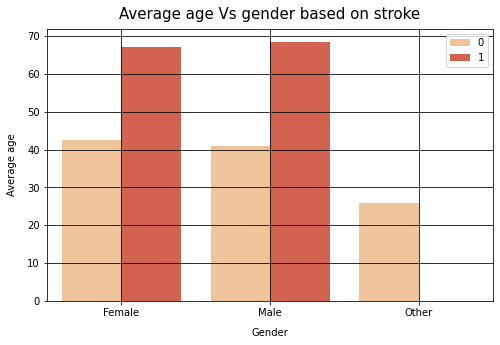

In [19]:
df1=df.groupby(by=['gender','stroke'])['age'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=df1,x='gender',y='age',hue='stroke',palette='OrRd')
plt.title('Average age Vs gender based on stroke',fontsize=15,pad=10)
plt.xlabel('Gender',labelpad=10)
plt.ylabel('Average age',labelpad=10)
plt.legend(loc='upper right')
plt.grid(c='k')
plt.show()

### Count of stroke occurred to people with hypertension and heart disease

In [20]:
df2=pd.crosstab(df['hypertension'],df['stroke'])    
df2

stroke,0,1
hypertension,,
0,4429,183
1,432,66


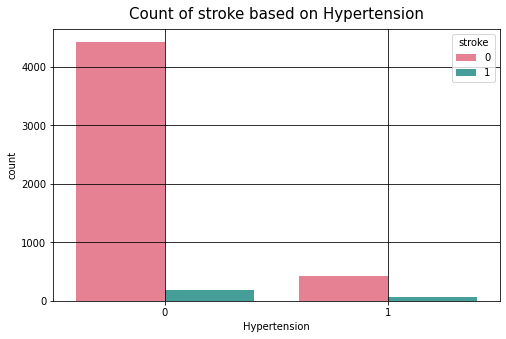

In [21]:
plt.figure(figsize=(8,5))
plt.title('Count of stroke based on Hypertension',fontsize=15,pad=10)
sns.countplot(data=df,x='hypertension',hue='stroke',palette='husl')
plt.xlabel('Hypertension')
plt.grid(c='k')
plt.show()

In [22]:
df2=pd.crosstab(df['heart_disease'],df['stroke'])    
df2

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


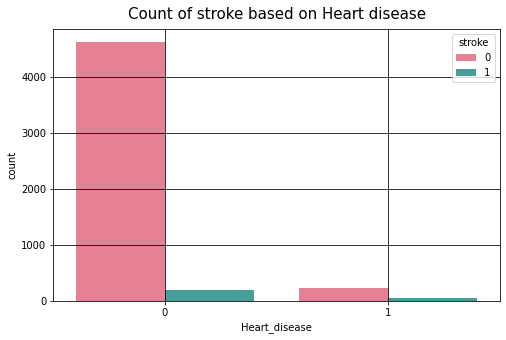

In [23]:
plt.figure(figsize=(8,5))
plt.title('Count of stroke based on Heart disease',fontsize=15,pad=10)
sns.countplot(data=df,x='heart_disease',hue='stroke',palette='husl')
plt.xlabel('Heart_disease')
plt.grid(c='k')
plt.show()

## Data Preprocessing
1. Handling Missing values
2. Outlier treatment
3. Converting categorical features to numeric
4. Scaling if needed
5. Transformation if needed

#### 1. Handling Missing values
- We have already observed that the only attribute with missing values in this dataset is **bmi** with about 4% null values.
  - we decide to drop these small percentage of missing values as it will not result in much loss of information 

In [24]:
#dropping missing vaulues
df.dropna(inplace=True)

In [25]:
#Verify if missing values has been trimmed
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- **bmi** is now free from any missing values

In [26]:
df.shape

(4909, 11)

#### 2. Outlier treatment
- As observed during EDA, here only **avg_glucose_level** and **bmi** has outliers

In [27]:
#Display the skewness of the attributes

pd.DataFrame({'skewness':df_num.skew()})

,skewness
age,-0.137059
hypertension,2.715392
heart_disease,3.947244
avg_glucose_level,1.572284
bmi,1.055340
stroke,4.193284


- As both **avg_glucose_level**, **bmi** are right (positively) skewed its better to perform IQR based fitting for treatment of outliers 

In [28]:
#Removing outliers of bmi

q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
LB=q1-(1.5*iqr)
UB=q3+(1.5*iqr)
df=df[(df['bmi']>LB)&(df['bmi']<UB)]


In [29]:
#Creating new_df and removing outliers of avg_glucose_level

q1=df['avg_glucose_level'].quantile(0.25)
q3=df['avg_glucose_level'].quantile(0.75)
iqr=q3-q1
LB=q1-(1.5*iqr)
UB=q3+(1.5*iqr)
new_df=df[(df['avg_glucose_level']>LB)&(df['avg_glucose_level']<UB)]


In [30]:
new_df.shape

(4255, 11)

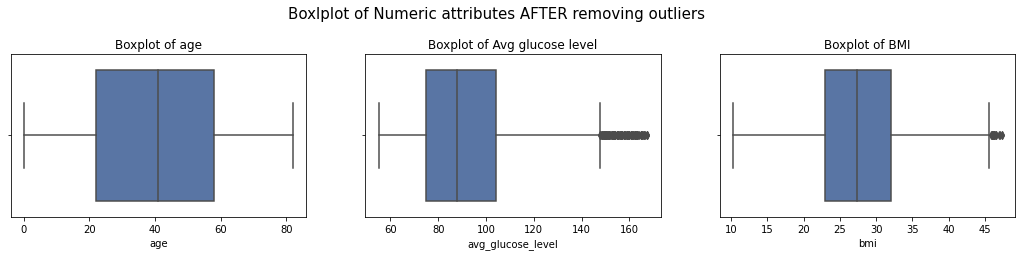

In [31]:
#Boxplots AFTER outlier treatment

sns.set_palette('deep')

plt.figure(figsize=(18,3))
plt.suptitle('Boxlplot of Numeric attributes AFTER removing outliers',\
             fontsize=15,y=1.1)


plt.subplot(1,3,1)
plt.title('Boxplot of age')
sns.boxplot(data=new_df,x='age')

plt.subplot(1,3,2)
plt.title('Boxplot of Avg glucose level')
sns.boxplot(data=new_df,x='avg_glucose_level')

plt.subplot(1,3,3)
plt.title('Boxplot of BMI')
sns.boxplot(data=new_df,x='bmi')

plt.show()


In [32]:
#Check skewness of attributes

pd.DataFrame({'Skewness AFTER outlier treatment':new_df.select_dtypes(include='number').skew()})

,Skewness AFTER outlier treatment
age,-0.005421
hypertension,3.421060
heart_disease,4.950424
avg_glucose_level,0.821473
bmi,0.343483
stroke,5.323510


- We can infer that the numeric attributes except those having binary records(i.e **hypertension, heart_disease, stoke**)
now shows gaussian like distribution


#### 3. Converting categorical features to numeric

In [33]:
#Display sample of categorical features

new_df.select_dtypes(include='object').sample(5)

,gender,ever_married,work_type,Residence_type,smoking_status
4426,Male,Yes,Govt_job,Rural,never smoked
2020,Female,No,Private,Rural,smokes
1763,Male,No,Private,Rural,never smoked
796,Female,No,Private,Urban,never smoked
2664,Male,Yes,Self-employed,Urban,never smoked


In [34]:
#Check the number of unique categories in the categorical columns
s=1
for col in new_df.select_dtypes(include='object').columns:
    print(f"""{s}. Attribute: {col}
   Some of the Unique values: {list(new_df[col].unique()[0:5])} 
   Number of unique values:{new_df[col].nunique()}\n""")
    s+=1

1. Attribute: gender
   Some of the Unique values: ['Male', 'Female', 'Other'] 
   Number of unique values:3

2. Attribute: ever_married
   Some of the Unique values: ['Yes', 'No'] 
   Number of unique values:2

3. Attribute: work_type
   Some of the Unique values: ['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'] 
   Number of unique values:5

4. Attribute: Residence_type
   Some of the Unique values: ['Rural', 'Urban'] 
   Number of unique values:2

5. Attribute: smoking_status
   Some of the Unique values: ['never smoked', 'Unknown', 'smokes', 'formerly smoked'] 
   Number of unique values:4



- Label encoding all categorical features.

#### Label Encoding 

In [35]:
cat_lst=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

# Importing label encoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

#Converting all categorical features to numeric

for col in cat_lst:
    new_df[col]=LE.fit_transform(new_df[col])

- All categorical features have been converted to numeric whilst avoiding the problem of multicollinearity

In [36]:
# Verify sample of dataset

new_df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,0,81.0,1,0,1,2,0,80.43,29.7,2,1


<AxesSubplot: >

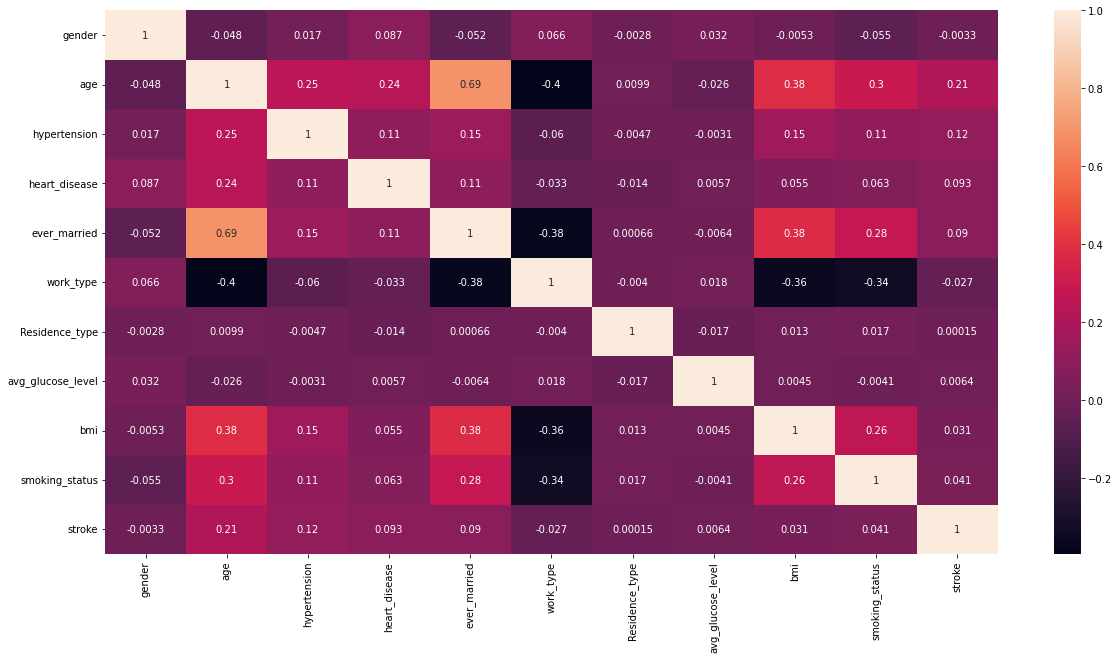

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data=new_df.corr(),annot=True)

## Applying Classification algorithms
1. Logistic Regression
2. KNN Classifier
3. Decision Tree Classification
4. Random Forest Classification

### 1. Logistic Regression

In [38]:
# Convert all data type to int

new_df=new_df.astype(int)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             4255 non-null   int32
 1   age                4255 non-null   int32
 2   hypertension       4255 non-null   int32
 3   heart_disease      4255 non-null   int32
 4   ever_married       4255 non-null   int32
 5   work_type          4255 non-null   int32
 6   Residence_type     4255 non-null   int32
 7   avg_glucose_level  4255 non-null   int32
 8   bmi                4255 non-null   int32
 9   smoking_status     4255 non-null   int32
 10  stroke             4255 non-null   int32
dtypes: int32(11)
memory usage: 216.1 KB


In [40]:
#Check if the target class is balance or imbalance

new_df['stroke'].value_counts()

0    4119
1     136
Name: stroke, dtype: int64

- Note that the data is highly imbalance

#### Separate the variables and train_test_split

In [41]:
# Separate the dependent and independent variables

x=new_df.drop('stroke',axis=1).values
y=new_df['stroke'].values

#Train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [42]:
#Display shapes of the train_test_split

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3191, 10), (1064, 10), (3191,), (1064,))

#### Scaling the data

In [43]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
x_train=MMS.fit_transform(x_train)
x_test=MMS.fit_transform(x_test)

#### Load and fit the data over trainig set

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(class_weight="balanced",random_state=99)
log_reg.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=99)

In [45]:
#Predict outcome of testing data

log_reg.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

#### Evaluation metrics for Logistic regression

In [46]:
from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,log_reg.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,log_reg.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,log_reg.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,log_reg.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,log_reg.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.7330827067669173
2. F1-score: 0.14457831325301204
3. Recall score: 0.75
4. Precision score: 0.08
5. Confusion matrix: 
[[756 276]
 [  8  24]]


In [47]:
from sklearn.metrics import classification_report
print("\033[1mClassification report for the Logistic Regression model:\033[0m\n")
print(classification_report(y_test, log_reg.predict(x_test)))

Classification report for the Logistic Regression model:

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1032
           1       0.08      0.75      0.14        32

    accuracy                           0.73      1064
   macro avg       0.53      0.74      0.49      1064
weighted avg       0.96      0.73      0.82      1064



### --------------------------------------------- Logistic Regression END --------------------------------------------

### 2. KNN Classifier

In [48]:
#Importing the KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(weights='distance')

In [49]:
#Fit the training data for KNN Classifier

knn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [50]:
#Predict the test dataset based on KNN Classifier

knn.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
#Evaluation metrics for KNN Classifier

from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,knn.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,knn.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,knn.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,knn.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,knn.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.9661654135338346
2. F1-score: 0.05263157894736842
3. Recall score: 0.03125
4. Precision score: 0.16666666666666666
5. Confusion matrix: 
[[1027    5]
 [  31    1]]


In [52]:
#Classification report of KNN Classifier

from sklearn.metrics import classification_report
print("\033[1mClassification report for the KNN Classifier:\033[0m\n")
print(classification_report(y_test, knn.predict(x_test)))

Classification report for the KNN Classifier:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1032
           1       0.17      0.03      0.05        32

    accuracy                           0.97      1064
   macro avg       0.57      0.51      0.52      1064
weighted avg       0.95      0.97      0.95      1064



### --------------------------------------------- KNN Classifier END --------------------------------------------

## 3. Decision Tree Classification

In [53]:
#Importing Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(class_weight="balanced")

In [54]:
#Fitting DT over trainig data

DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [55]:
#Predicting the test data

DT.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [56]:
#Evaluation metrics for DecisionTree Classifier

from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,DT.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,DT.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,DT.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,DT.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,DT.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.9360902255639098
2. F1-score: 0.05555555555555556
3. Recall score: 0.0625
4. Precision score: 0.05
5. Confusion matrix: 
[[994  38]
 [ 30   2]]


In [57]:
#Classification report of DecisionTree Classifier

from sklearn.metrics import classification_report
print("\033[1mClassification report for the DT Classifier:\033[0m\n")
print(classification_report(y_test, DT.predict(x_test)))

Classification report for the DT Classifier:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1032
           1       0.05      0.06      0.06        32

    accuracy                           0.94      1064
   macro avg       0.51      0.51      0.51      1064
weighted avg       0.94      0.94      0.94      1064



### --------------------------------------------- Decision Tree Classifier END --------------------------------------------

## 3. Random Forest Classification

In [58]:
#Importing Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [59]:
#Fitting RF Classifier over training data

RF.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
#Prdicting the test data

RF.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
#Evaluation metrics for RandomForest Classifier

from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,RF.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,RF.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,RF.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,RF.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,RF.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.9689849624060151
2. F1-score: 0.0
3. Recall score: 0.0
4. Precision score: 0.0
5. Confusion matrix: 
[[1031    1]
 [  32    0]]


In [62]:
#Classification report of RandomForest Classifier

from sklearn.metrics import classification_report
print("\033[1mClassification report for the DT Classifier:\033[0m\n")
print(classification_report(y_test, RF.predict(x_test)))

Classification report for the DT Classifier:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1032
           1       0.00      0.00      0.00        32

    accuracy                           0.97      1064
   macro avg       0.48      0.50      0.49      1064
weighted avg       0.94      0.97      0.95      1064



### --------------------------------------------- Random Forest Classifier END --------------------------------------------